In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn
#import torch
print(os.getpid())

508206


# Data folder

In [2]:
from ChromAn.src.file_io.data_organization import search_fovs_in_folders
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1'
# scan subfolders
folders, fovs = search_fovs_in_folders(data_folder)
# correction folder
correction_folder=os.path.join(data_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1
-- 17 folders, 65 fovs detected.


## Load color_usage

In [3]:
from ChromAn.src.file_io.data_organization import Color_Usage
# Color usage file marks the organization of imaging files
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/Analysis/Color_Usage.csv


# Illumnation correction

In [4]:

illumination_folder = folders[0]

In [5]:
# shared parameters
single_im_size = np.array([40,2048,2048])
all_colors = ['750','647','488','405']
# image and threads
num_images = 60
num_threads = 15

In [6]:
#reload(illumination)
from ChromAn.src.correction_tools import illumination

-- 60 among 65 dax files will be loaded in data_folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 1.771s.
-- directly load:['748', '637', '545', '477', '405'] illumination profiles for files


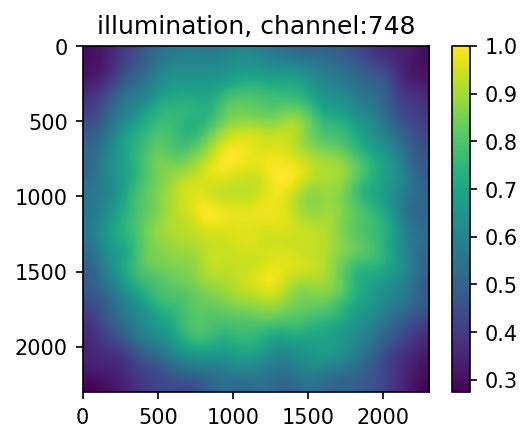

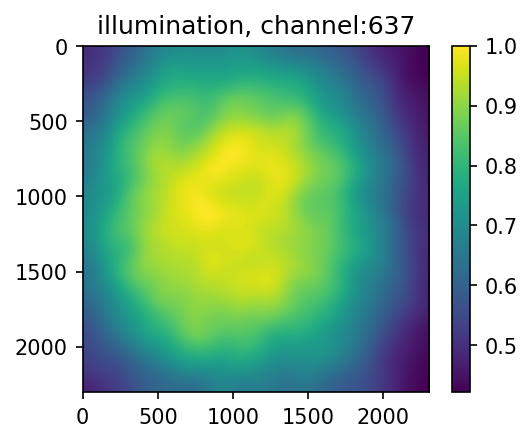

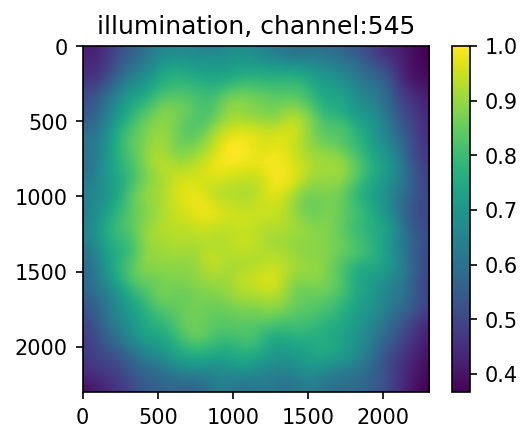

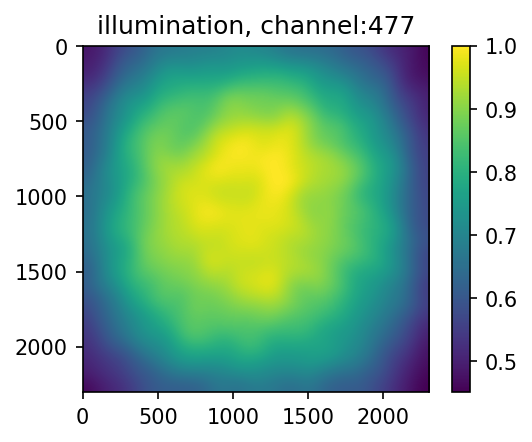

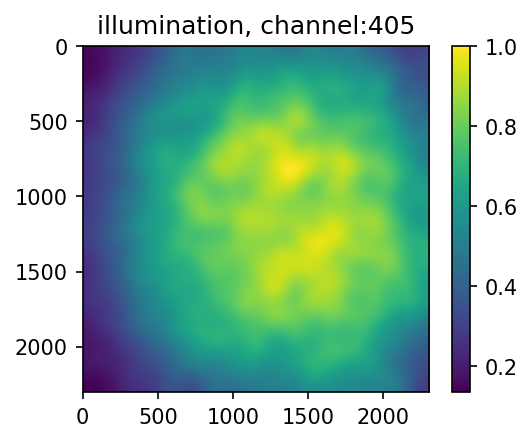

-- finish generating illumination profiles, time:13.31s


In [7]:
illumination_pfs = illumination.Generate_illumination_correction(
    illumination_folder, 
    num_threads=num_threads, parallel=True, num_images=num_images,
    remove_cap=True, cap_th_per=[5, 90],
    save_folder=correction_folder, overwrite=False,
)

# Chromatic abbrevation

In [4]:
from ChromAn.src.file_io.dax_process import DaxProcesser
daxp = DaxProcesser(os.path.join(folders[0], fovs[0]))

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_00_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']


In [5]:
num_chromatic_channels = 3
chroamtic_channels = daxp.channels[:num_chromatic_channels]
print(chroamtic_channels)
chromatic_ref_channel = chroamtic_channels[int(num_chromatic_channels/2)]
print(chromatic_ref_channel)

['748', '637', '545']
637


## 750 to 637

In [6]:
cc_folder = folders[0]
ref_folder = folders[1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1,
ref_folder:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2


In [7]:
from ChromAn.src.file_io import image_crop
reload(image_crop)

<module 'ChromAn.src.file_io.image_crop' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/file_io/image_crop.py'>

In [12]:

from ChromAn.src.correction_tools import chromatic
reload(chromatic)

<module 'ChromAn.src.correction_tools.chromatic' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/correction_tools/chromatic.py'>

In [13]:
from ChromAn.src.correction_tools import chromatic
fiducial_channel = color_usage_df.get_fiducial_channel(color_usage_df)
chromatic_channel = [_ch for _ch, _info in \
                color_usage_df.loc[os.path.basename(cc_folder)].items()
                if _info not in ['empty', 'beads', 'DAPI', np.nan]][0]

In [ ]:
chromatic_pfs, chromatic_consts = chromatic.Generate_chromatic_abbrevation(
    cc_folder, ref_folder, chromatic_channel=chromatic_channel,
    ref_channel=chromatic_ref_channel,
    fiducial_channel=fiducial_channel,
    num_threads=15, start_fov=0, num_images=45,
    parallel=True,
    correction_folder=correction_folder,
)

-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 1.667s.
-- loading illumination correction profile from file:
	 637 illumination_correction_637_2304x2304.npy
	 748 illumination_correction_748_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
++ generating chromatic info for 45 images in 15 threads in -- directly load from temp_file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_00_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_01.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_01_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4

- Loaded images for channels:['637', '477'] in 25.580s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 24.859s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 24.112s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 24.908s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 24.197s.
- Correct illumination for channels: ['637',

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 3.867s.
- Finished illumination correction in 8.212s.
300 fitted in 54.745s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_15.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_15_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
-- fit spots in channel: 637, - Loaded images for channels:['748', '477'] in 1.256s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
300 fitted in 61.054s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_10.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_10_processed.hdf5
-- all used channels: 

-- corrected illumination for channel 477 in 4.409s.
- Finished illumination correction in 8.632s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
300 fitted in 78.008s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_12.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_12_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_20.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_20_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
300 fitted in 78.837s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_05.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/2

-- corrected illumination for channel 637 in 6.845s.
-- corrected illumination for channel 477 in 4.767s.
- Finished illumination correction in 9.954s.
-- fit spots in channel: 637, - Loaded images for channels:['637', '477'] in 8.609s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- corrected illumination for channel 637 in 5.496s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_27.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_27_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- corrected illumination for channel 477 in 5.295s.
- Finished illumination correction in 10.407s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_

-- corrected illumination for channel 748 in 3.549s.
300 fitted in 63.548s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_21.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_21_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['748', '477'] in 1.352s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
300 fitted in 68.622s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_19.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_19_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
-

-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
-- drift 0: [  0.14 -26.19  18.1 ] in 2.835s.
- Loaded images for channels:['748', '477'] in 2.148s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- corrected illumination for channel 748 in 5.920s.
- Loaded images for channels:['748', '477'] in 2.028s.
-- drift 1: [  0.16 -25.1   16.99] in 4.139s.- Correct illumination for channels: ['748', '477']

-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
300 fitted in 72.950s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_28.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_28_processed.hdf5
-- all used channels: ['748', '637', '545', '4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [  0.25 -24.63  17.08] in 3.885s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 1: [  0.09 -25.62  17.71] in 3.794s.
-- drift 0: [  0.38 -24.81  16.4 ] in 3.935s.
-- drift 2: [  0.45 -24.74  19.06] in 4.454s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 1: [  0.19 -25.03  16.9 ] in 3.390s.
-- drift 2: [  0.05 -25.81  18.03] in 3.446s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [  0.09 -25.6   17.6 ] in 2.765s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 1: [  0.31 -24.85  16.58] in 2.948s.
-- drift 2: [  0.35 -25.24  16.95] in 3.115s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 2: [  0.44 -24.94  16.54] in 2.579s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 55.306s.
- Finished warp correction in 55.319s.
-- fit spots in channel: 748, -- corrected warp for channel 748 in 53.551s.
- Finished warp correction in 53.562s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 52.423s.
- Finished warp correction in 52.450s.
-- fit spots in channel: 748, -- corrected warp for channel 748 in 55.269s.
- Finished warp correction in 55.308s.
-- fit spots in channel: 748, -- corrected warp for channel 748 in 48.553s.
- Finished warp correction in 48.577s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 50.002s.
- Finished warp correction in 50.046s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 43.649s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 5 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_16_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_31.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_31_processed.hdf5
-- all used channels: ['748', '637', '545', '477']

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)



-- single image size: [  30 2304 2304]
-- corrected warp for channel 748 in 50.561s.
- Finished warp correction in 50.571s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 748 in 38.615s.
- Finished warp correction in 38.631s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 6.840s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 21.766s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 50 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_18_channel_748_ref_637.pkl
-- corrected illumination for channel 637 in 3.799s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 45.456s.
- Finished warp correction in 45.469s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_32.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_32_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 748 in 52.007s.
- Finished warp correction in 52.085s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 477 in 3.871s.
- Finished illumination correction in 7.686s.
-- corrected warp for channel 748 in 50.803s.
- Finished warp correction in 50.857s.
-- fit spots in channel: 748, -- fit spots in channel: 637, -- corrected warp for channel 748 in 50.591s.
- Finished warp correction in 50.625s.
-- fit spots in channel: 748, 300 fitted in 27.763s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 47.944s.
- Finished warp correction in 47.959s.
-- fit spots in channel: 748, --- saving 27 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_17_channel_748_ref_637.pkl
-- corrected warp for channel 748 in 47.326s.
- Finished warp correction in 47.349s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_33.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_33_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 7.217s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 26.866s.
-- corrected illumination for channel 637 in 3.783s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 44 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_19_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_34.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_34_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- Loaded images for channels:['637', '477'] in 6.965s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected illumination for channel 477 in 4.110s.
- Finished illumination correction in 7.911s.
-- fit spots in channel: 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected illumination for channel 637 in 4.165s.
300 fitted in 31.803s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 33 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_20_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 37.129s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_35.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_35_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
- Loaded images for channels:['637', '477'] in 6.628s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
300 fitted in 24.852s.
300 fitted in 30.139s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 14 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_21_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_36.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_36_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 50 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_27_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_37.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_37_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
--- saving 24 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_23_channel_748_ref_637.pkl
-- corrected illumination for channel 477 in 3.915s.
- Finished illumination correction in 8.097s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_38.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_38_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
-- fit spots in channel: 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected illumination for channel 637 in 3.728s.
300 fitted in 38.456s.
--- saving 10 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_22_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_39.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_39_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 24.312s.
-- corrected illumination for channel 477 in 3.913s.
- Finished illumination correction in 7.653s.
300 fitted in 22.601s.
-- fit spots in channel: 637, --- saving 11 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_25_channel_748_ref_637.pkl
--- saving 46 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_24_channel_748_ref_637.pkl
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_40.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_40_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_41.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1p

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 15 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_29_channel_748_ref_637.pkl
-- corrected illumination for channel 637 in 3.904s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_44.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H1M2/Conv_zscan_44_processed.hdf5
-- all used channels: ['748', '637', '545', '477']
-- single image size: [  30 2304 2304]


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 35.417s.
-- corrected illumination for channel 637 in 4.262s.
-- corrected illumination for channel 637 in 4.085s.
-- corrected illumination for channel 637 in 3.917s.
--- saving 30 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_26_channel_748_ref_637.pkl
-- corrected illumination for channel 477 in 3.795s.
- Finished illumination correction in 7.707s.
- Loaded images for channels:['637', '477'] in 9.745s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
-- fit spots in channel: 637, - Loaded images for channels:['637', '477'] in 10.113s.
- Correct illumination for channels: ['637', '477']
-- Keep channels: ['637', '477'] for corr_illumination.
- Start illumination correction for channels:['637', '477'].
- Loaded images for channels:['637', '477'] in 14.353s.
- Correct illumination for channels

-- corrected illumination for channel 477 in 4.850s.
- Finished illumination correction in 8.844s.
- Loaded images for channels:['748', '477'] in 1.350s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] for corr_illumination.
- Start illumination correction for channels:['748', '477'].
-- corrected illumination for channel 477 in 4.436s.
- Finished illumination correction in 8.856s.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
+ Calculate drift with fiducial_channel: 477
-- start aligning given source image to given reference image.
300 fitted in 69.816s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_38.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_38_processed.hdf5
-- drift 2: [  0.12 -25.03  16.44] in 2.524s.
-- all used channels: ['748', '637', '545', '477', '

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 0: [  0.09 -24.75  14.89] in 3.117s.
300 fitted in 88.232s.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_41.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/Conv_zscan_41_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  30 2304 2304]
-- drift 2: [  0.07 -24.38  15.36] in 4.192s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].
-- drift 1: [  0.29 -25.78  17.43] in 3.940s.
-- corrected illumination for channel 748 in 5.244s.
- Loaded images for channels:['748', '477'] in 1.798s.
- Correct illumination for channels: ['748', '477']
-- Keep channels: ['748', '477'] 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- drift 2: [ 1.000e-02 -2.517e+01  1.760e+01] in 2.527s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
- Start warpping images drift:['748'], chromatic:[]
- Start 3D warpping for channels:['748'].


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 48.592s.
- Finished warp correction in 48.624s.
-- corrected warp for channel 748 in 38.767s.
- Finished warp correction in 38.798s.
-- fit spots in channel: 748, -- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 52.944s.
- Finished warp correction in 52.954s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 748 in 49.882s.
- Finished warp correction in 49.894s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 50.622s.
- Finished warp correction in 50.640s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 49.759s.
- Finished warp correction in 49.772s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 14.484s.
-- corrected warp for channel 748 in 47.188s.
- Finished warp correction in 47.239s.
-- fit spots in channel: 748, -- corrected warp for channel 748 in 34.097s.
- Finished warp correction in 34.133s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 748, --- saving 29 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_39_channel_748_ref_637.pkl
300 fitted in 38.087s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 16 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_31_channel_748_ref_637.pkl
-- corrected warp for channel 748 in 49.280s.
- Finished warp correction in 49.299s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 46.831s.
- Finished warp correction in 46.847s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 45.384s.
- Finished warp correction in 45.399s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

-- corrected warp for channel 748 in 39.634s.
- Finished warp correction in 39.645s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 26.280s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 35 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_34_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 23.409s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- corrected warp for channel 748 in 45.774s.
- Finished warp correction in 45.780s.
-- fit spots in channel: 748, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 29 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_33_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

300 fitted in 20.552s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 35 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_36_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 15.478s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 36 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_35_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 24.979s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 18 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_32_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 27.175s.
--- saving 16 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_42_channel_748_ref_637.pkl
300 fitted in 26.265s.
300 fitted in 20.323s.
--- saving 11 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_38_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


--- saving 29 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_40_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 23.306s.
--- saving 23 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_37_channel_748_ref_637.pkl


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 28.884s.
--- saving 10 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_43_channel_748_ref_637.pkl
300 fitted in 19.004s.
--- saving 24 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_41_channel_748_ref_637.pkl
300 fitted in 21.427s.
--- saving 10 points to file:/lab/weissman_imaging/puzheng/PE_LT/20230902-zombie_4T1preEditEmx1/H0M1/chromatic_Conv_zscan_44_channel_748_ref_637.pkl


Process ForkPoolWorker-20:
Process ForkPoolWorker-28:
Process ForkPoolWorker-30:
Process ForkPoolWorker-21:
Process ForkPoolWorker-19:
Process ForkPoolWorker-27:
Process ForkPoolWorker-16:
Process ForkPoolWorker-25:
Process ForkPoolWorker-26:
Process ForkPoolWorker-23:
Process ForkPoolWorker-29:
Process ForkPoolWorker-24:
Process ForkPoolWorker-18:
Process ForkPoolWorker-22:
Process ForkPoolWorker-17:
Traceback (most recent call last):
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", l

  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlo

In [68]:
from ChromAn.src.file_io import dax_process
reload(dax_process)

<module 'ChromAn.src.file_io.dax_process' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/file_io/dax_process.py'>

In [50]:
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [54]:
coord_dict = {
    'coords':np.concatenate([dax.spots_748.to_coords(),ref_dax.spots_637.to_coords()]),
    'class_ids': list(0 * np.ones(len(dax.spots_748))) + list(1 * np.ones(len(ref_dax.spots_637)))
}

<IPython.core.display.Javascript object>


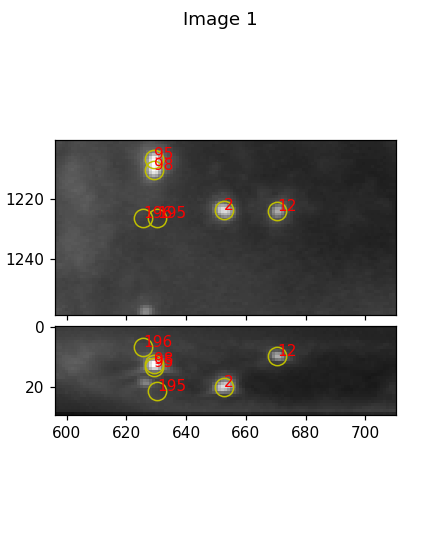

In [55]:
%matplotlib notebook
imshow_mark_3d([dax.im_748, ref_dax.im_637], use_dict=coord_dict)

In [57]:
_ref_spots = getattr(ref_dax, f"spots_{637}")
_ca_spots = getattr(dax, f"spots_{748}")

In [58]:
from ChromAn.src.spot_tools.match_spots import find_paired_centers

In [38]:
getattr(ref_dax, f"spots_{chromatic_ref_channel}")

Spots3D([[ 6.6895414e+04,  1.6890285e+01,  1.8859056e+02, ...,
           3.6476934e-01,  2.1872811e-01,  2.6631758e+03],
         [ 3.1387322e+04,  1.9083902e+01,  1.2241821e+03, ...,
           5.6831932e-01, -1.6405219e-02,  1.1015238e+03],
         [ 2.6934783e+04,  2.4537216e+01,  1.2190223e+03, ...,
           4.8760164e-01, -5.8274537e-02,  9.3717957e+02],
         ...,
         [ 1.1336667e+03,  1.2410753e+01,  2.0413334e+03, ...,
           4.3945140e-01,  3.3159576e-02,  6.4934448e+01],
         [ 1.0593964e+03,  1.6150572e+01,  1.0524681e+03, ...,
           5.5229557e-01,  1.8402332e-01,  7.1796303e+01],
         [ 1.2083524e+03,  1.0873021e+01,  1.7295068e+03, ...,
           4.4668210e-01, -9.0279892e-02,  4.9858261e+01]], dtype=float32)